In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report


# Load the dataset
df = pd.read_csv('C:/Users/Lenovo/OneDrive - St. Clair College/SEM 4/Health Care/diabetes_012_health_indicators_BRFSS2015.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
print("Descriptive Analysis: ")
df.describe()

Descriptive Analysis: 


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [3]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
print(f"Duplicates are {df.duplicated().sum()}")


Duplicates are 23899


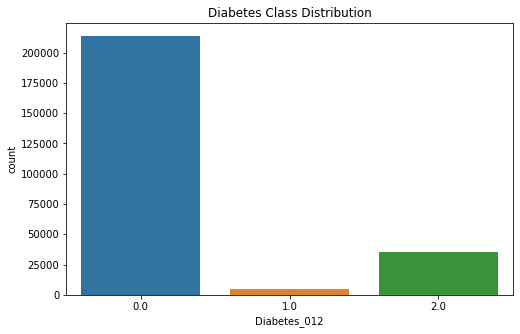

In [6]:
# Check target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Diabetes_012')
plt.title('Diabetes Class Distribution')
plt.show()


In [7]:

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
# Print class percentages
print("Class distribution (%):")
print(df['Diabetes_012'].value_counts(normalize=True)*100)


Class distribution (%):
Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64


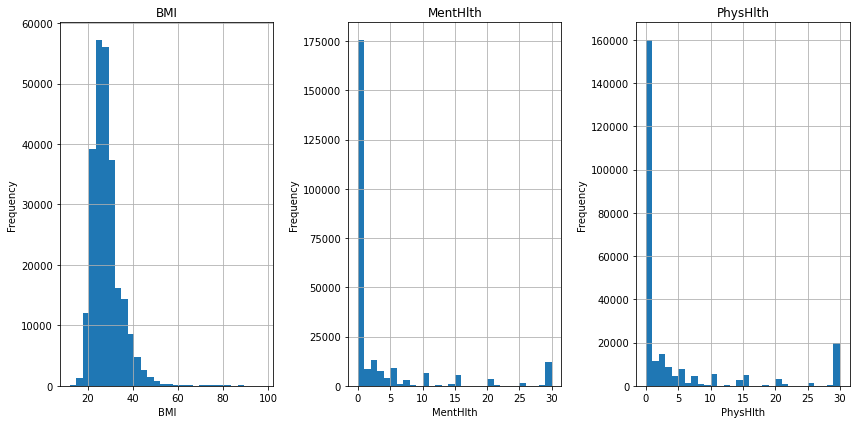

In [9]:
num_cols = ['BMI', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    df[col].hist(bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(20, 5)):
    
    """
    This function return plt subplots by 
    looping through the df columns
    display only the desired columns
    """
    
    # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()

    # use for loop to plot
    for i in range(len(li_col)):

        # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i])

    # adjust the spacing of the subplots
    plt.subplots_adjust(
        wspace=0.5, 
        hspace=0.5
    )

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

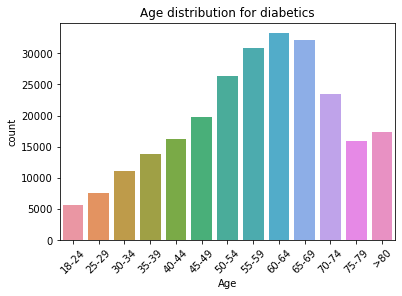

In [11]:
# Check age distribution for people with diabetes
ax = sns.countplot(data=df, x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

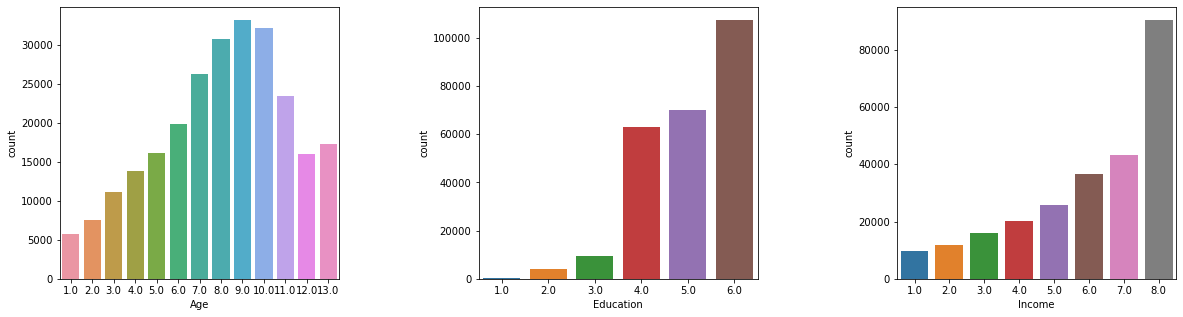

In [12]:

ida_plot(['Age', 'Education', 'Income'], 1, 3)


Observations:
* The following plots show that the majority of the respondents are in middle age, high education, and high income group.

* Age groups, 8, 9 and 10 have respondents over 30000 each. Over 100000, which is around 40% of the respondents, were being college for 4 year or more. Around 30% of them are in the highest income group.

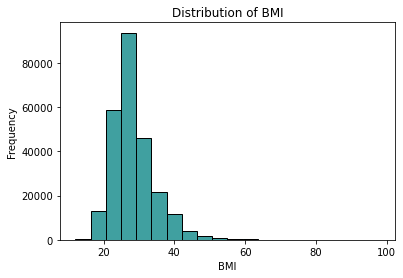

In [13]:
# Histogram
sns.histplot(data=df, x='BMI', bins=20, color='teal', kde=False)

plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

The BMI of the dataset is right-skewed. Most of the values are between 20 to 30, with extreme maximum value 98.

In [14]:
df['BMI'].describe()


count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='MentHlth', ylabel='count'>

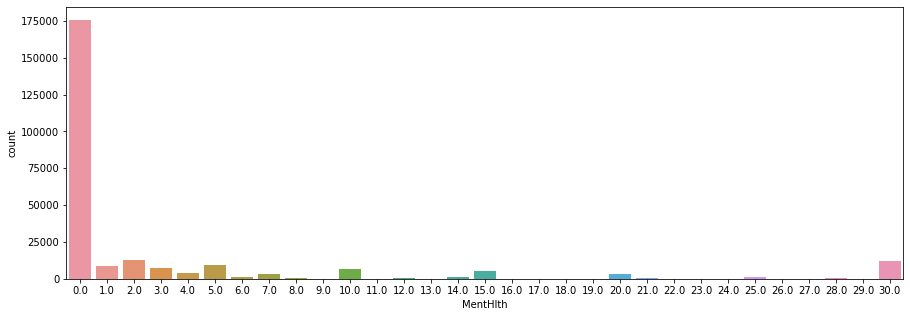

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='MentHlth', ax=ax)

Observations:
* Most of the respondents (over 175 thousands) do not have any bad mental health day.
* Some of the others experienced 2 days and 30 days having bad mental health,
* followed by 1 day, 3 days, and 10 days. But none of these happened to over 20000 respondents.

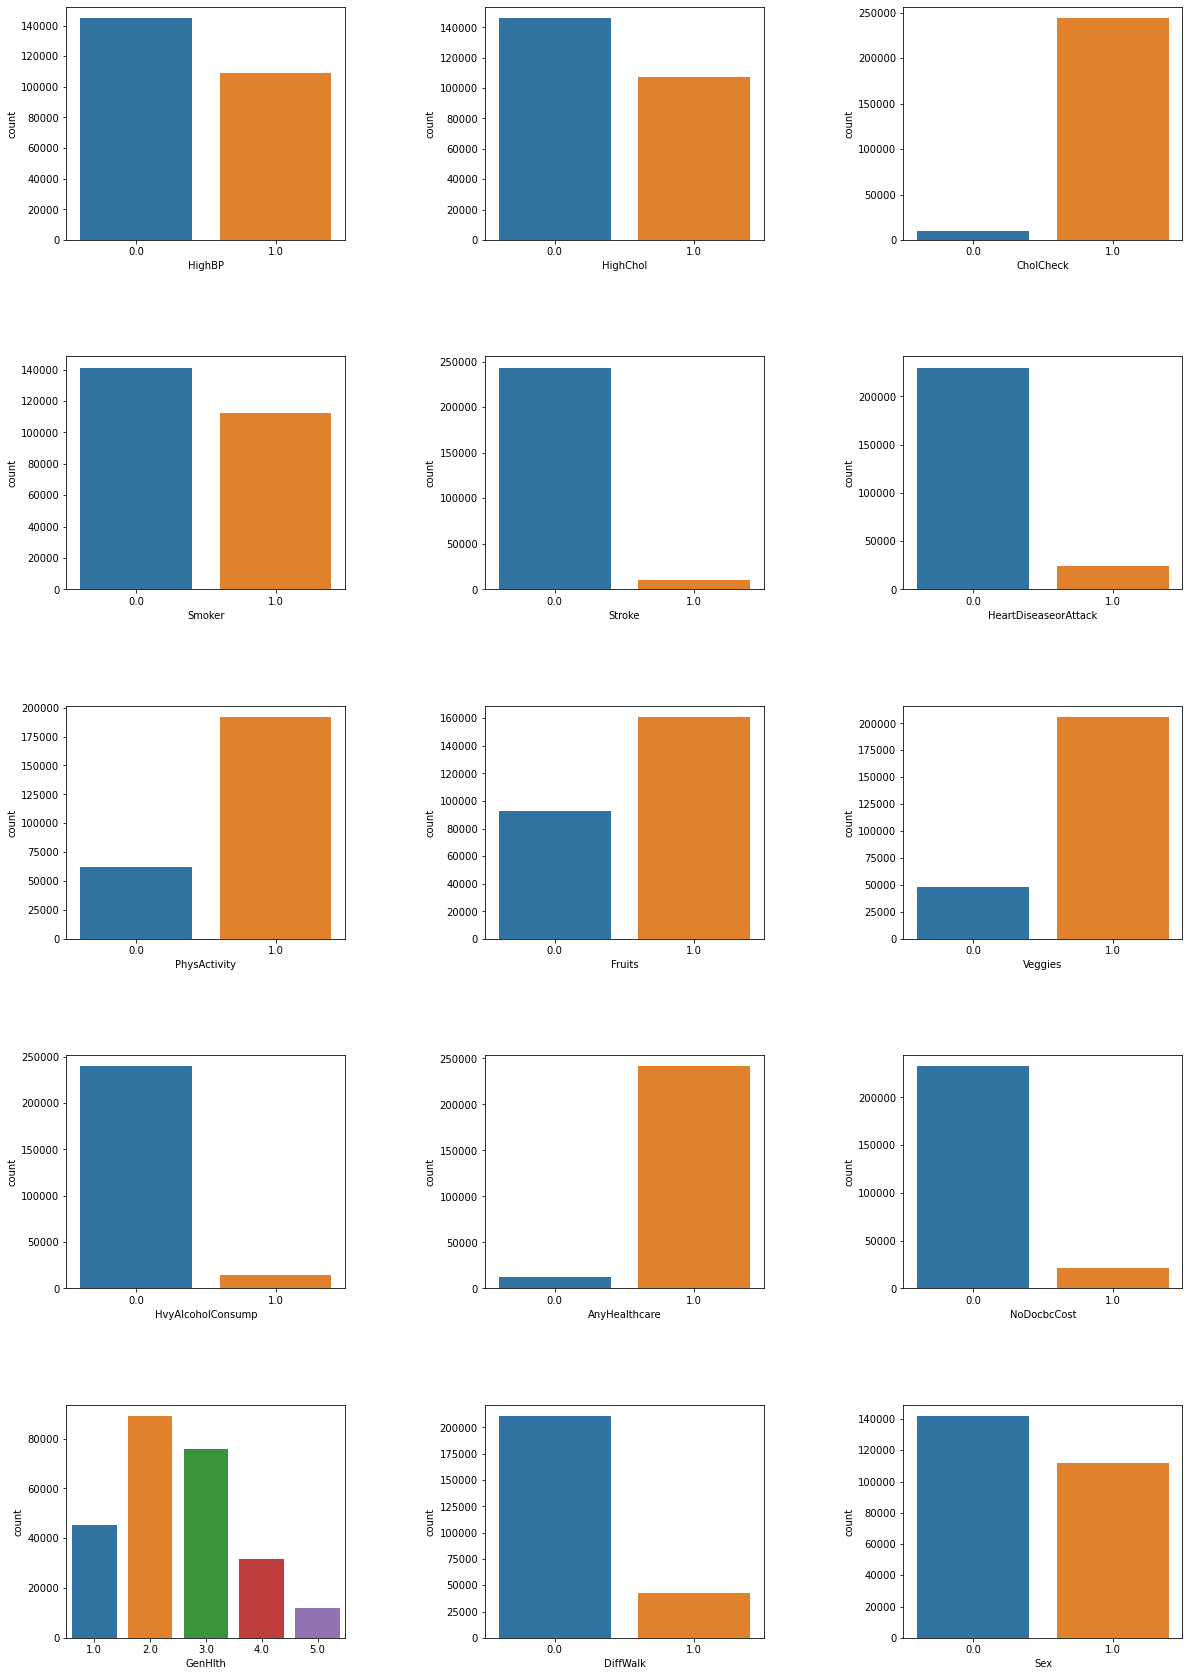

In [16]:
# Concerning about the readibility of the subplot figures
# "BMI", "MentHlth", and "PhysHlth" will be analysed in further section instead.
li_col = [x for x in df.columns if x not in ["Diabetes_012", "Age", "Education", "Income", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(li_col, int(len(li_col)/3+0.5), figsize=(20, 30))

Observations:
* High blood pressure (HighBP), high blood cholesterol (HighChol), Smoker, and Sex are relatively evenly distributed. Higher amount of respondents have never been told by professional to have high blood pressure nor high blood cholesterol. Respondents are mostly smoker and mostly female. But none of these groups have any dominant classes.

<AxesSubplot:>

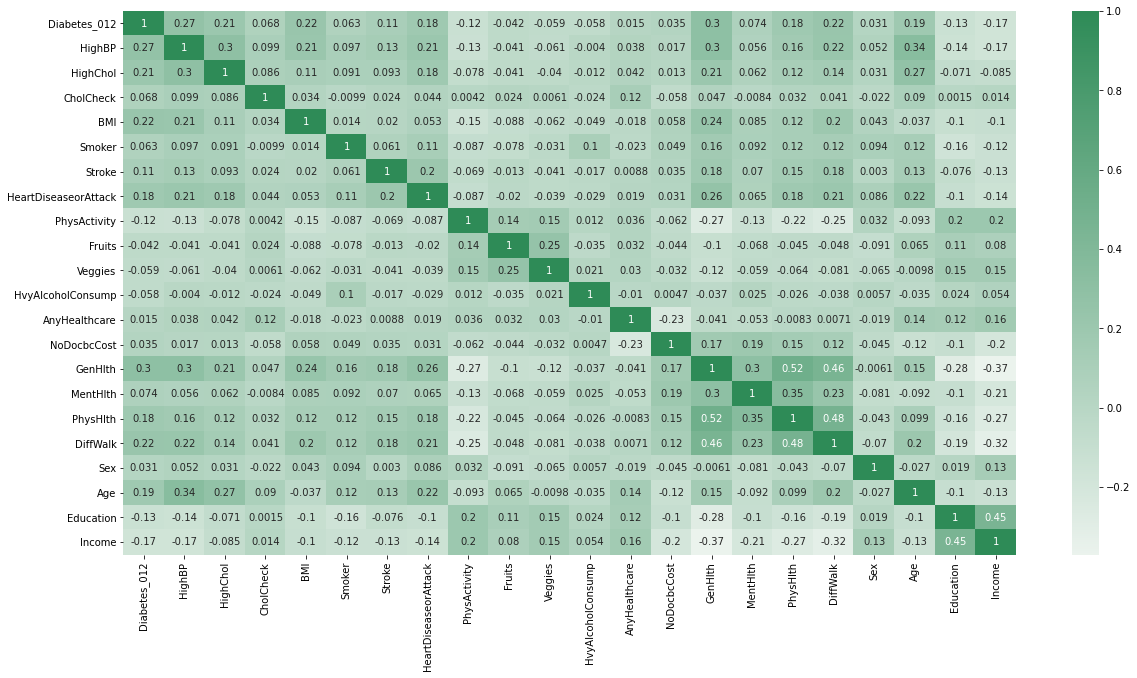

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap =(sns.light_palette("seagreen", as_cmap=True)) )

Observations
Positive Correlations:
1. (GenHlth) with:
(DiffWalk): 0.45
Indicates that as individuals perceive their general health as worse, they may experience more difficulty walking.
(PhysHlth): 0.52
Suggests a strong relationship between self-reported general health and physical health issues.
2. (PhysHlth) with (DiffWalk): 0.47
Confirms a strong link between reported physical health problems and mobility challenges.
3. (HighBP) with Age: 0.34
Indicates that older individuals are more likely to have high blood pressure, a common trend in medical studies.
4. (MentHlth) with (PhysHlth): 0.34
Highlights the interplay between mental and physical health, where worsening mental health may correlate with physical health problems.

Observations
Negative Correlations:
1. Income with:
* (GenHlth): -0.33
Suggests that individuals with higher income tend to report better general health.
* (DiffWalk): -0.30
Implies fewer mobility issues among higher-income groups, possibly due to better access to healthcare and lifestyle choices.
* (PhysHlth): -0.24
Reinforces the relationship between income and fewer physical health problems.
2.Education with (GenHlth): -0.24
Suggests that higher education levels may correlate with better self-reported general health.
* Other Observations:
  * Age correlates positively with High Blood Pressure (0.34), Stroke (0.13), and Difficulty Walking (0.21), aligning with common aging trends in health.

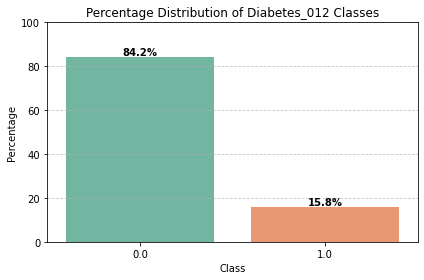

In [18]:
# Step 1: Replace class 2 with class 1
diabetes_02_index = df[df['Diabetes_012'] == 2].index
df.loc[diabetes_02_index, 'Diabetes_012'] = 1

# Step 2: Calculate value counts as percentages
class_counts = df['Diabetes_012'].value_counts(normalize=True) * 100

# Step 3: Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette='Set2')

# Add labels
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

# Plot styling
plt.title('Percentage Distribution of Diabetes_012 Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Randomly selected samples from class 0
# Create new dataframe, which consists of balanced class data
# Check the shape and result of created dataframe

# Retrieve the number of class 1 samples
num_class_1 = len(df[df['Diabetes_012']==1])

# Sampling and create new dataframe to contain the two balanced classes
sample_0 = df[df['Diabetes_012']==0].sample(num_class_1, random_state=73)
sample_1 = df[df['Diabetes_012']==1]
balanced_df = pd.concat([sample_0, sample_1], axis=0)

# Check the shape of created dataframe
# Confirm the distribution of two classes
print(f'The shape of dataset is {balanced_df.shape}')
balanced_df['Diabetes_012'].value_counts()

The shape of dataset is (79954, 22)


Diabetes_012
0.0    39977
1.0    39977
Name: count, dtype: int64

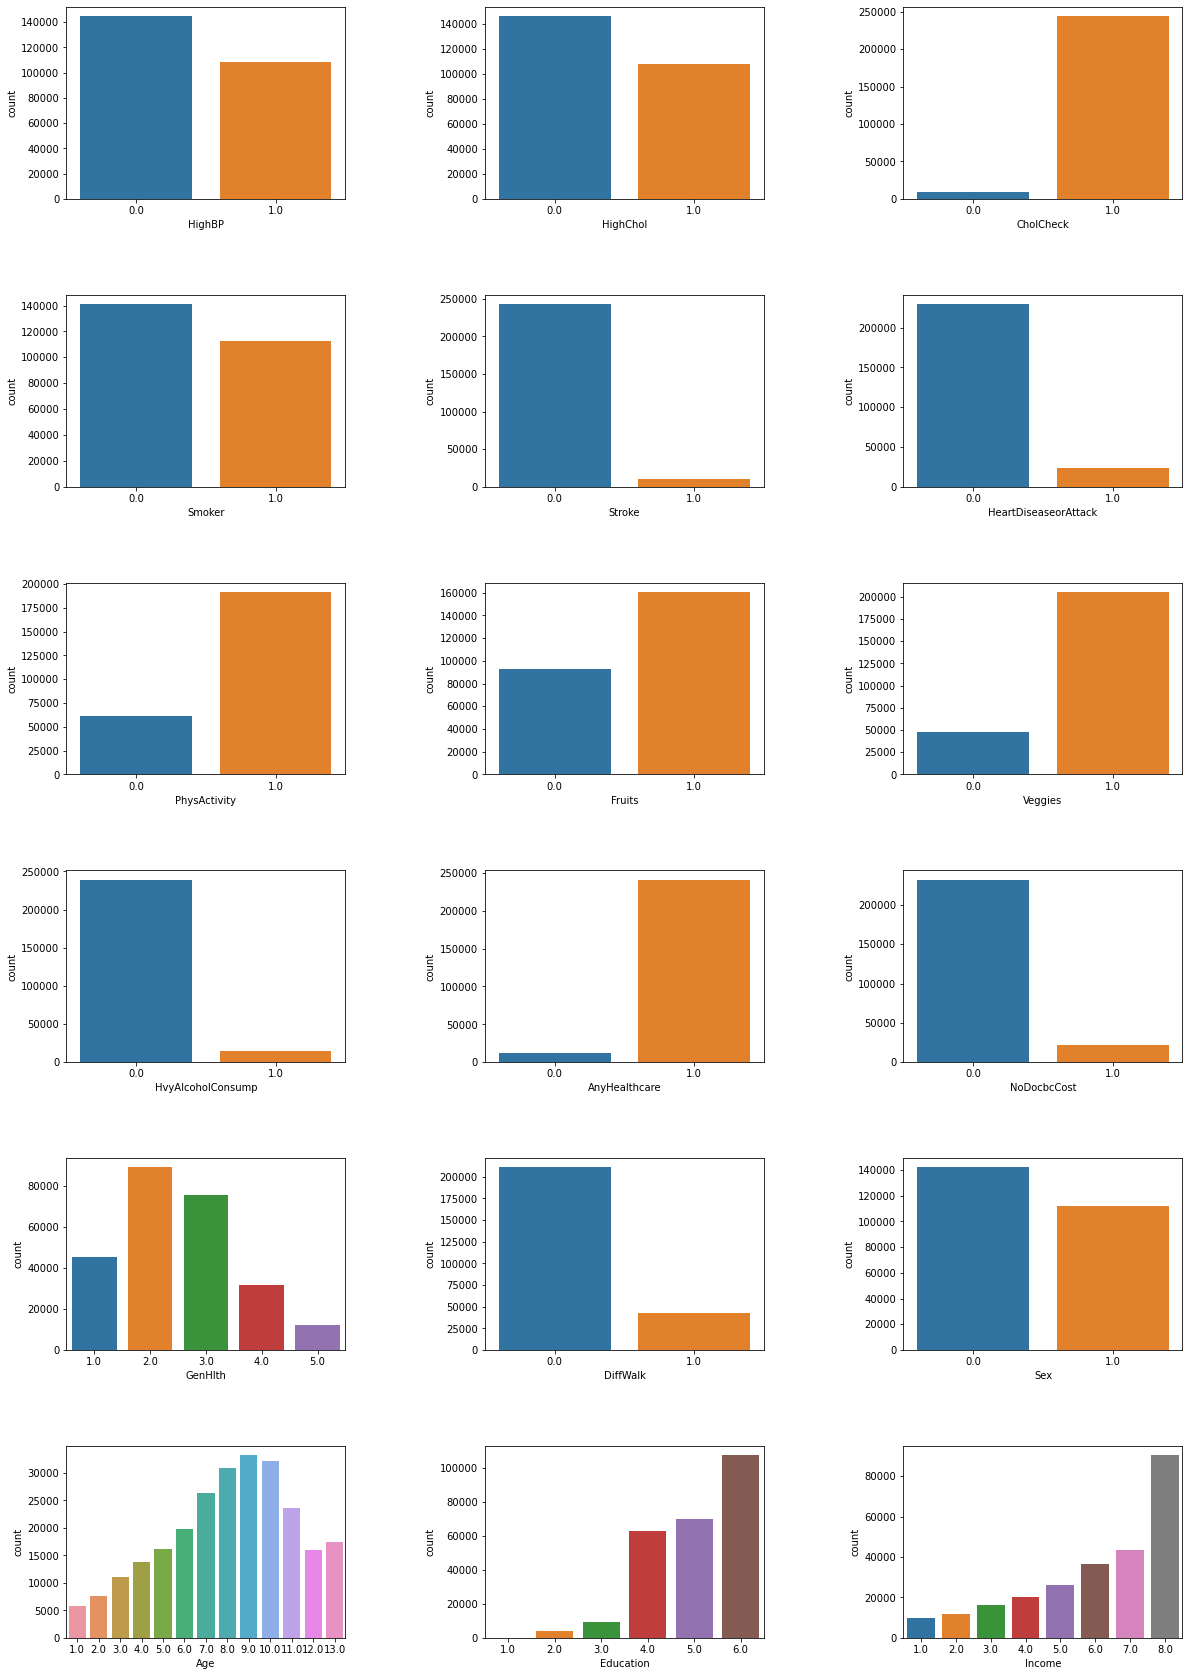

In [20]:
li_plot = [x for x in df.columns if x not in ["Diabetes_012", "BMI", "MentHlth", "PhysHlth"]]
ida_plot(li_plot, row=int(len(li_plot)/3+0.5), figsize=(20, 30))

In [21]:
fea = df.drop(columns="Diabetes_012")
tar = df["Diabetes_012"]

In [22]:
# Result check
fea.sample(5, random_state=73)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
67229,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,6.0,8.0
59459,1.0,0.0,1.0,35.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,3.0,1.0,0.0,0.0,8.0,4.0,6.0
156399,0.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,10.0,5.0,6.0
204300,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,5.0
104082,1.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,4.0,5.0


In [23]:
# first split
X_train, X_test, y_train, y_test = train_test_split(fea, tar, test_size=0.2, shuffle=True, random_state=73)

# check shapes of split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(202944, 21)
(50736, 21)
(202944,)
(50736,)


In [24]:
# second split
X_train_train, X_train_valid, y_train_train, y_train_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=73)

# check shapes of split
print(X_train_train.shape)
print(X_train_valid.shape)
print(y_train_train.shape)
print(y_train_valid.shape)

(162355, 21)
(40589, 21)
(162355,)
(40589,)


✅ SMOTE applied. Balanced class distribution:
Diabetes_012
0.0    170834
1.0    170834
Name: count, dtype: int64

📊 Classification Report (Logistic Regression):

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     42869
         1.0       0.34      0.76      0.47      7867

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736


📊 Classification Report (Decision Tree):

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42869
         1.0       0.31      0.34      0.32      7867

    accuracy                           0.78     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.79      0.78      0.78     50736


📊 Classification Report (Random Forest):

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42869
         1.0       0.55      0.23      0.32      7867

    accuracy                           0.85     50736
   macro avg       0.71      0.60      0.62     50736
weighted avg       0.82      0.85      0.82     50736



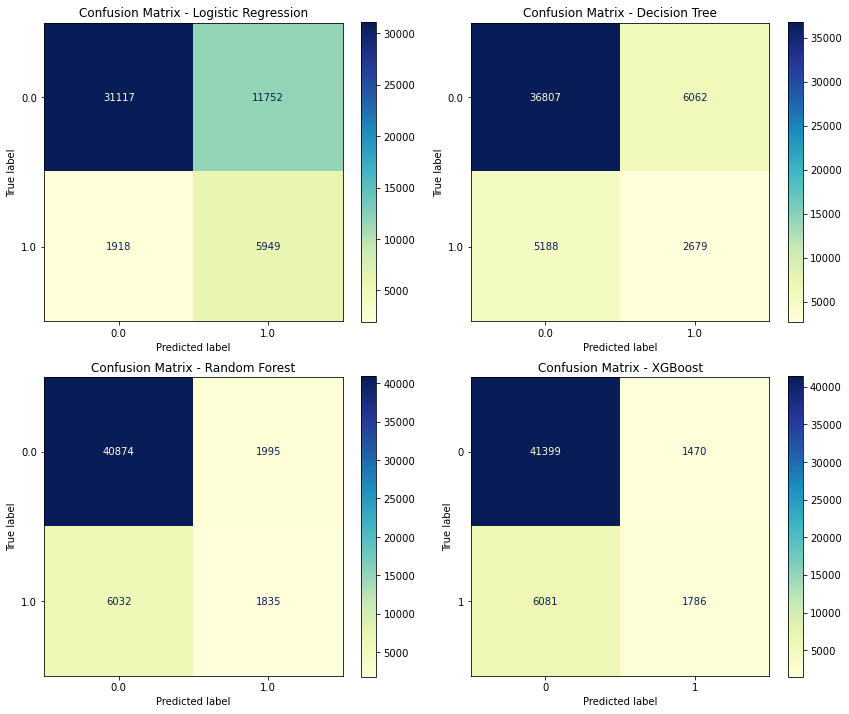

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied. Balanced class distribution:")
print(y_train_bal.value_counts())

# Step 2: Define models WITHOUT class_weight
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 3: Prepare subplot layout for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Step 4: Train, Predict, and Evaluate
for idx, (name, model) in enumerate(models.items()):
    print(f"\n📊 Classification Report ({name}):\n")

    # Train on SMOTE-balanced data
    model.fit(X_train_bal, y_train_bal)

    # Predict on original test set
    y_pred = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], cmap='YlGnBu', values_format='d')
    axes[idx].set_title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()


✅ SMOTE applied. Balanced class distribution:
Diabetes_012
0.0    170834
1.0    170834
Name: count, dtype: int64

📊 Classification Report (Logistic Regression):

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     42869
         1.0       0.34      0.76      0.47      7867

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736


📊 Classification Report (Decision Tree):

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42869
         1.0       0.31      0.34      0.32      7867

    accuracy                           0.78     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.79      0.78      0.78     50736


📊 Classification Report (Random Forest):

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42869
         1.0       0.55      0.23      0.32      7867

    accuracy                           0.85     50736
   macro avg       0.71      0.60      0.62     50736
weighted avg       0.82      0.85      0.82     50736



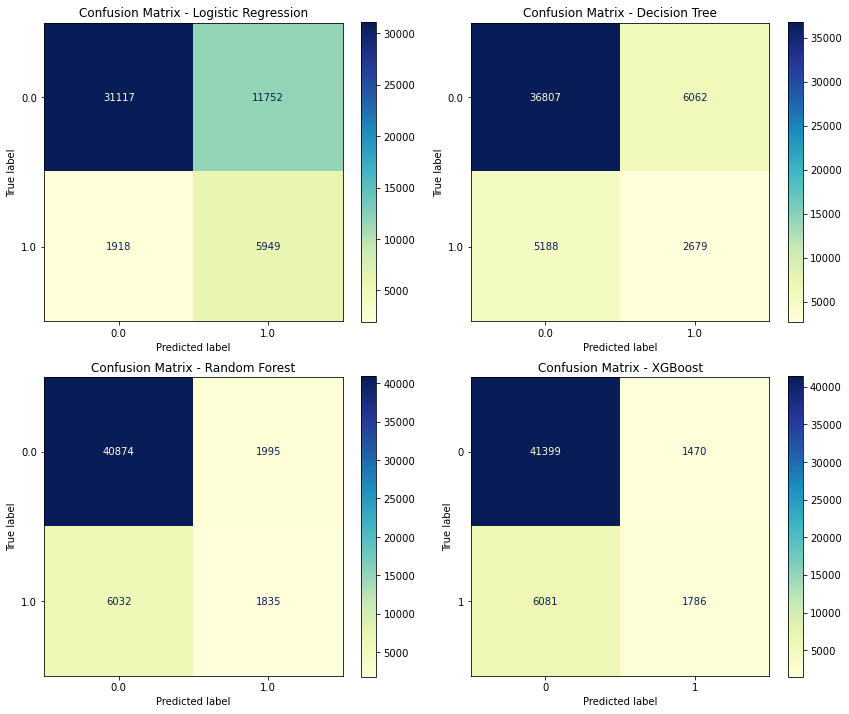

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied. Balanced class distribution:")
print(y_train_bal.value_counts())

# Step 2: Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 3: Prepare subplots for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Step 4: Train, Predict, Evaluate
for idx, (name, model) in enumerate(models.items()):
    print(f"\n📊 Classification Report ({name}):\n")

    # Train on SMOTE-balanced data
    model.fit(X_train_bal, y_train_bal)

    # Predict on original test set
    y_pred = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], cmap='YlGnBu', values_format='d')
    axes[idx].set_title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()



🔍 Tuning Logistic Regression...
✅ Best Parameters for Logistic Regression: {'C': 1}

📊 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     42869
         1.0       0.34      0.76      0.47      7867

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736


🔍 Tuning Decision Tree...
✅ Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}

📊 Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     42869
         1.0       0.35      0.30      0.32      7867

    accuracy                           0.80     50736
   macro avg       0.61      0.60      0.60     50736
weighted avg       0.79      0.80      0.80     50736


🔍 Tuning Random Forest...
✅ Best Parameters for Random Forest

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:50:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42869
         1.0       0.55      0.23      0.33      7867

    accuracy                           0.85     50736
   macro avg       0.71      0.60      0.62     50736
weighted avg       0.82      0.85      0.83     50736



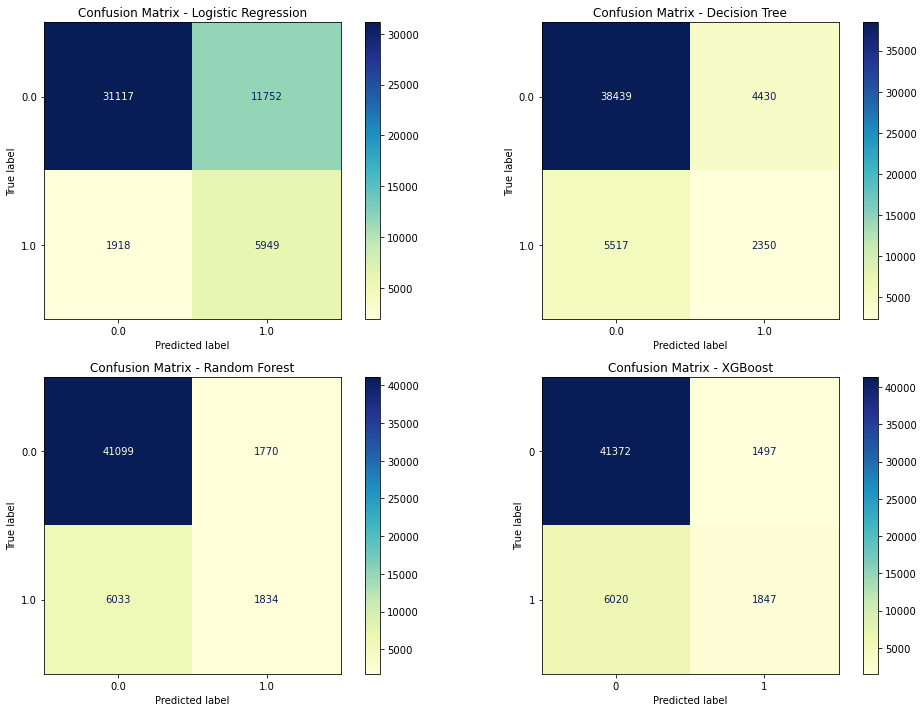

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Step 2: Define models and hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.05, 0.1]
        }
    }
}

# Step 3: Prepare subplots for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Step 4: Fine-tune and evaluate each model
for idx, (name, config) in enumerate(param_grids.items()):
    print(f"\n🔍 Tuning {name}...")

    grid = GridSearchCV(config['model'], config['params'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_bal, y_train_bal)

    best_model = grid.best_estimator_
    print(f"✅ Best Parameters for {name}: {grid.best_params_}\n")

    # Predict on original test data
    y_pred = best_model.predict(X_test)

    # Print classification report
    print(f"📊 Classification Report ({name}):")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(ax=axes[idx], cmap='YlGnBu', values_format='d')
    axes[idx].set_title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()


Retraining Logistic Regression for ROC curve...
Retraining Decision Tree for ROC curve...
Retraining Random Forest for ROC curve...
Retraining XGBoost for ROC curve...


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


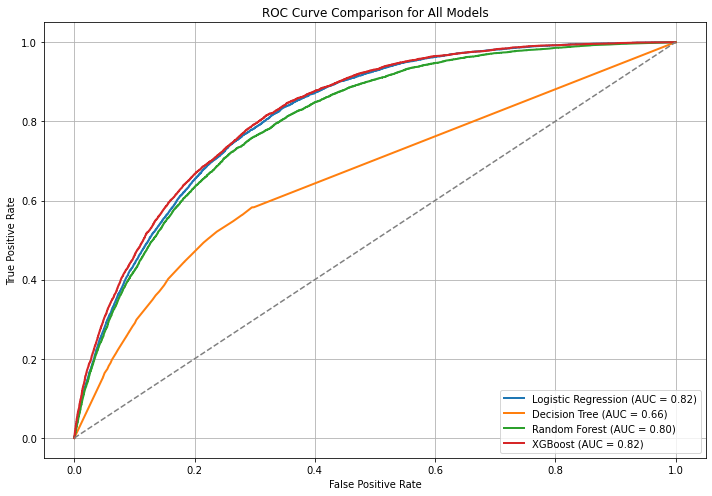

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prepare a dictionary to store fitted best models from your grid search
fitted_models = {}

# Refit each model with best params and collect predicted probabilities
for name, config in param_grids.items():
    print(f"Retraining {name} for ROC curve...")
    grid = GridSearchCV(config['model'], config['params'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_bal, y_train_bal)
    best_model = grid.best_estimator_
    fitted_models[name] = best_model

# Initialize ROC data
roc_results = {}

plt.figure(figsize=(10, 7))

# Plot ROC curve for each model
for name, model in fitted_models.items():
    # Predict probabilities (for positive class: 1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_results[name] = roc_auc

    # Plot curve
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import classification_report, precision_score, recall_score

# y_test: True labels
# y_pred: Predicted labels from your model

# Full classification report
print(classification_report(y_test, y_pred))

# OR if you only want precision and recall for the positive class (label = 1)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42869
         1.0       0.55      0.23      0.33      7867

    accuracy                           0.85     50736
   macro avg       0.71      0.60      0.62     50736
weighted avg       0.82      0.85      0.83     50736

Precision: 0.55
Recall: 0.23


In [45]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]


In [46]:
df.drop(colomns , axis= 1 ,inplace=True)


In [48]:
X=df.drop("Diabetes_012",axis=1)
Y=df["Diabetes_012"]

In [49]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [50]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [52]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [53]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8718
Test set score: 0.8664


In [57]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
import math
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1335751360140079
Root Mean Squared Error : 0.36547932364773783


In [58]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      8027
         1.0       0.90      0.83      0.86      7964

    accuracy                           0.87     15991
   macro avg       0.87      0.87      0.87     15991
weighted avg       0.87      0.87      0.87     15991



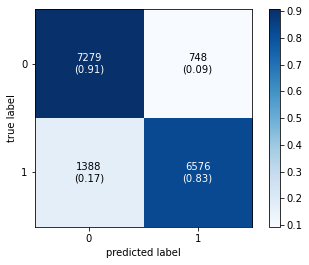

In [60]:
from mlxtend.plotting import plot_confusion_matrix

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [61]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [62]:
# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

Training set score: 0.8890
Test set score: 0.8755


In [63]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1245075354887124
Root Mean Squared Error : 0.35285625329404663


In [64]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89      8027
         1.0       0.95      0.79      0.86      7964

    accuracy                           0.88     15991
   macro avg       0.89      0.88      0.87     15991
weighted avg       0.89      0.88      0.87     15991



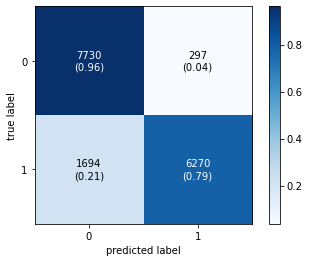

In [65]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [66]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [67]:
# make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8948
Test set score: 0.8864


In [68]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.11362641485835782
Root Mean Squared Error : 0.33708517448614944


In [69]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      8027
         1.0       0.96      0.81      0.88      7964

    accuracy                           0.89     15991
   macro avg       0.90      0.89      0.89     15991
weighted avg       0.90      0.89      0.89     15991



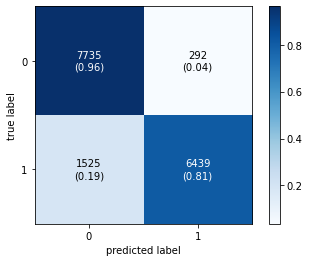

In [70]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [71]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8989
Test set score: 0.8709


In [73]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1290726033393784
Root Mean Squared Error : 0.3592667579103004


In [74]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      8027
         1.0       0.87      0.87      0.87      7964

    accuracy                           0.87     15991
   macro avg       0.87      0.87      0.87     15991
weighted avg       0.87      0.87      0.87     15991



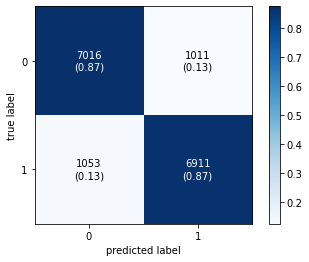

In [75]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

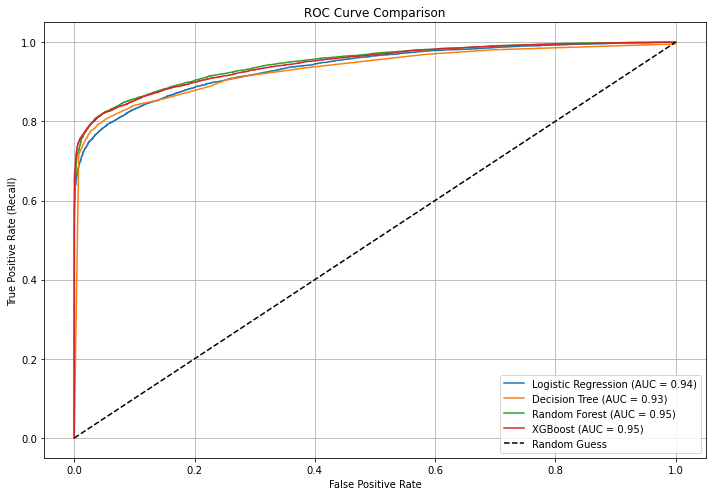

In [77]:
plt.figure(figsize=(10, 7))

models = {
    'Logistic Regression': lg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xg
}

for name, model in models.items():
    # Get predicted probabilities for the positive class (1)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Labels and legend
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

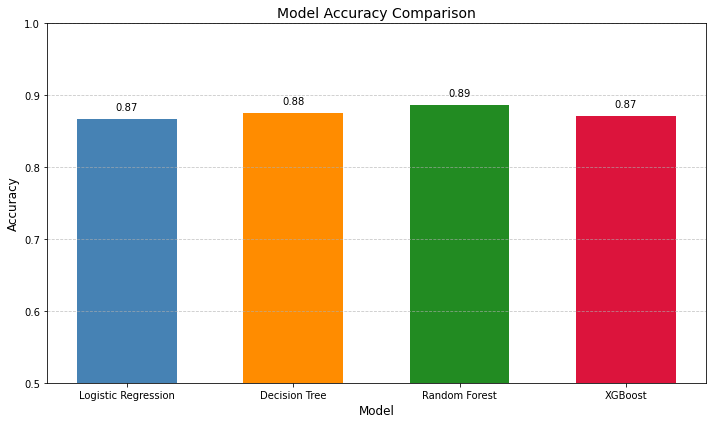

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Example: trained models
models = {
    'Logistic Regression': lg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xg
}

# Calculate accuracies
accuracy_dict = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    accuracy_dict[name] = acc

# Prepare chart data
model_names = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Assign different colors to each model
colors = ['steelblue', 'darkorange', 'forestgreen', 'crimson']

# Plot vertical column chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values, color=colors, width=0.6)

plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
